<a href="https://colab.research.google.com/github/IsfaquethedataAnalyst/Dataanalysis/blob/main/Adidas_Sales_Analysis_Unveiling_Insights_through_Data_driven_Exploration_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing the Adidas US Sales dataset from different aspects so as to derive meaningful business insights which in turn helps in better decision making and business growth.

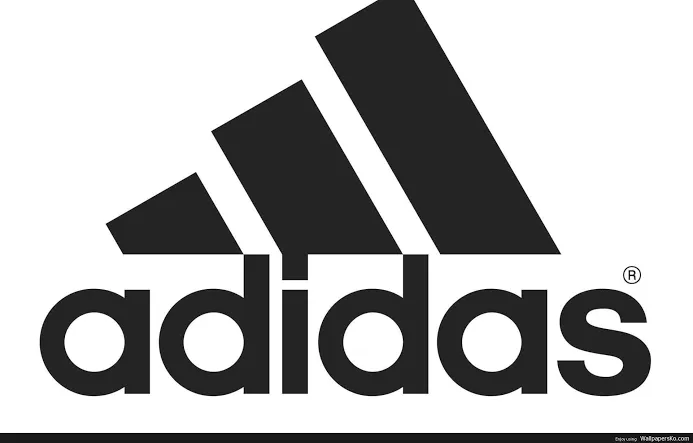

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [15]:
#Loading the dataset
adidas = pd.read_csv ('Adidas US Sales Datasets.csv')
adidas

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,NaN,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9648,NaN,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9649,NaN,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9650,NaN,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet


In [16]:
#Checking for the shape of the dataframe
adidas.shape

(9652, 14)

In [17]:
#checking for duplicate rows
adidas.duplicated().sum()

1

In [18]:
#checking data information
adidas.info

<bound method DataFrame.info of       Unnamed: 0   Unnamed: 1             Unnamed: 2    Unnamed: 3 Unnamed: 4  \
0            NaN          NaN  Adidas Sales Database           NaN        NaN   
1            NaN          NaN                    NaN           NaN        NaN   
2            NaN          NaN                    NaN           NaN        NaN   
3            NaN     Retailer            Retailer ID  Invoice Date     Region   
4            NaN  Foot Locker                1185732      1/1/2020  Northeast   
...          ...          ...                    ...           ...        ...   
9647         NaN  Foot Locker                1185732     1/24/2021  Northeast   
9648         NaN  Foot Locker                1185732     1/24/2021  Northeast   
9649         NaN  Foot Locker                1185732     2/22/2021  Northeast   
9650         NaN  Foot Locker                1185732     2/22/2021  Northeast   
9651         NaN  Foot Locker                1185732     2/22/2021  Northeast

In [19]:
#Checking top rows and columns
adidas.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store


In [20]:
adidas = adidas.drop(adidas.index[0:3]) #Removing First 3 rows

In [21]:
adidas.drop("Unnamed: 0", axis = 1, inplace = True) #Dropping first colums

In [22]:
adidas.columns = adidas.iloc[0] #Changing the column names

In [24]:
adidas = adidas.drop(adidas.index[0]) #Dropping the first row

In [25]:
adidas = adidas.reset_index(drop=True) #Reseting the index

In [26]:
adidas.duplicated().sum() #Checking whether the dataset have duplicated values

0

In [27]:
adidas.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [29]:
#Checking data information
adidas.info

<bound method DataFrame.info of 3        Retailer Retailer ID Invoice Date     Region          State  \
0     Foot Locker     1185732     1/1/2020  Northeast       New York   
1     Foot Locker     1185732     1/2/2020  Northeast       New York   
2     Foot Locker     1185732     1/3/2020  Northeast       New York   
3     Foot Locker     1185732     1/4/2020  Northeast       New York   
4     Foot Locker     1185732     1/5/2020  Northeast       New York   
...           ...         ...          ...        ...            ...   
9643  Foot Locker     1185732    1/24/2021  Northeast  New Hampshire   
9644  Foot Locker     1185732    1/24/2021  Northeast  New Hampshire   
9645  Foot Locker     1185732    2/22/2021  Northeast  New Hampshire   
9646  Foot Locker     1185732    2/22/2021  Northeast  New Hampshire   
9647  Foot Locker     1185732    2/22/2021  Northeast  New Hampshire   

3           City                    Product Price per Unit Units Sold  \
0       New York      Men's St

In [30]:
# Checking for null values
adidas.isnull().sum()

3
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [31]:
# Remove non-numeric characters from 'Total Sales' column
adidas['Total Sales'] = adidas['Total Sales'].str.replace(r'[$, ]', '', regex=True).astype(float)

# Remove non-numeric characters from 'Unit Sold' column
adidas['Units Sold'] = adidas['Units Sold'].str.replace(r'[$, ]', '', regex=True).astype(float)

# Remove non-numeric characters from 'Operating Profit' column

adidas['Operating Profit'] = adidas['Operating Profit'].str.replace(r'[$, ]', '', regex=True).astype(float)

# Remove non-numeric characters from 'Operating Margin' column

In [32]:
# Convert Invoice Date to DateTime Object
adidas['Invoice Date'] = pd.to_datetime(adidas['Invoice Date'])

In [33]:
# Extract Year and Month from Invoice Date
adidas['Year'] = adidas['Invoice Date'].dt.year
adidas['Month'] = adidas['Invoice Date'].dt.month

In [35]:
# Remove rows with NaN values in 'YOY Profit' column
yoy_cleaned = adidas.dropna(subset=['Operating Profit'])

print(yoy_cleaned)

3        Retailer Retailer ID Invoice Date     Region          State  \
0     Foot Locker     1185732   2020-01-01  Northeast       New York   
1     Foot Locker     1185732   2020-01-02  Northeast       New York   
2     Foot Locker     1185732   2020-01-03  Northeast       New York   
3     Foot Locker     1185732   2020-01-04  Northeast       New York   
4     Foot Locker     1185732   2020-01-05  Northeast       New York   
...           ...         ...          ...        ...            ...   
9643  Foot Locker     1185732   2021-01-24  Northeast  New Hampshire   
9644  Foot Locker     1185732   2021-01-24  Northeast  New Hampshire   
9645  Foot Locker     1185732   2021-02-22  Northeast  New Hampshire   
9646  Foot Locker     1185732   2021-02-22  Northeast  New Hampshire   
9647  Foot Locker     1185732   2021-02-22  Northeast  New Hampshire   

3           City                    Product Price per Unit  Units Sold  \
0       New York      Men's Street Footwear        $50.00    

In [36]:
#Calculate Total Revenue
total_revenue = adidas['Total Sales'].sum()

In [37]:
print(total_revenue)

899902125.0


In [38]:
#Calculate ‘YOY’ profit
adidas['YOY Profit'] = adidas['Operating Profit'].pct_change(periods=1) * 100
print(adidas)

3        Retailer Retailer ID Invoice Date     Region          State  \
0     Foot Locker     1185732   2020-01-01  Northeast       New York   
1     Foot Locker     1185732   2020-01-02  Northeast       New York   
2     Foot Locker     1185732   2020-01-03  Northeast       New York   
3     Foot Locker     1185732   2020-01-04  Northeast       New York   
4     Foot Locker     1185732   2020-01-05  Northeast       New York   
...           ...         ...          ...        ...            ...   
9643  Foot Locker     1185732   2021-01-24  Northeast  New Hampshire   
9644  Foot Locker     1185732   2021-01-24  Northeast  New Hampshire   
9645  Foot Locker     1185732   2021-02-22  Northeast  New Hampshire   
9646  Foot Locker     1185732   2021-02-22  Northeast  New Hampshire   
9647  Foot Locker     1185732   2021-02-22  Northeast  New Hampshire   

3           City                    Product Price per Unit  Units Sold  \
0       New York      Men's Street Footwear        $50.00    

In [39]:
#Calculate average revenue
total_revenue = adidas['Total Sales'].sum()
number_of_periods = adidas.shape[0]
average_revenue = total_revenue / number_of_periods

print(f"Average Revenue: {average_revenue}")

Average Revenue: 93273.4375


In [40]:
#Calculate revenue for each year
revenue_per_year = adidas.groupby('Year')['Total Sales'].sum()
print(revenue_per_year)

Year
2020    182080675.0
2021    717821450.0
Name: Total Sales, dtype: float64


In [41]:
#Calculate revenue for same period last year
revenue_last_year = []
for index, row in adidas.iterrows():
    same_period_last_year = adidas[(adidas['Year'] == row['Year'] - 1) & (adidas['Month'] == row['Month'])]
    revenue_last_year.append(same_period_last_year['Total Sales'].sum())

adidas['Revenue Last Year'] = revenue_last_year

print(adidas)

3        Retailer Retailer ID Invoice Date     Region          State  \
0     Foot Locker     1185732   2020-01-01  Northeast       New York   
1     Foot Locker     1185732   2020-01-02  Northeast       New York   
2     Foot Locker     1185732   2020-01-03  Northeast       New York   
3     Foot Locker     1185732   2020-01-04  Northeast       New York   
4     Foot Locker     1185732   2020-01-05  Northeast       New York   
...           ...         ...          ...        ...            ...   
9643  Foot Locker     1185732   2021-01-24  Northeast  New Hampshire   
9644  Foot Locker     1185732   2021-01-24  Northeast  New Hampshire   
9645  Foot Locker     1185732   2021-02-22  Northeast  New Hampshire   
9646  Foot Locker     1185732   2021-02-22  Northeast  New Hampshire   
9647  Foot Locker     1185732   2021-02-22  Northeast  New Hampshire   

3           City                    Product Price per Unit  Units Sold  \
0       New York      Men's Street Footwear        $50.00    

In [50]:
# Clean the data in the "Operating Margin" column
adidas["Operating Margin"] = adidas["Operating Margin"].str.replace("%", "")

# Convert the data in the "Operating Margin" column to numeric format
adidas["Operating Margin"] = pd.to_numeric(adidas["Operating Margin"])

# Calculate the average operating margin
average_operating_margin = adidas['Operating Margin'].mean()

# Print the average operating margin
print(average_operating_margin)


42.29912935323383


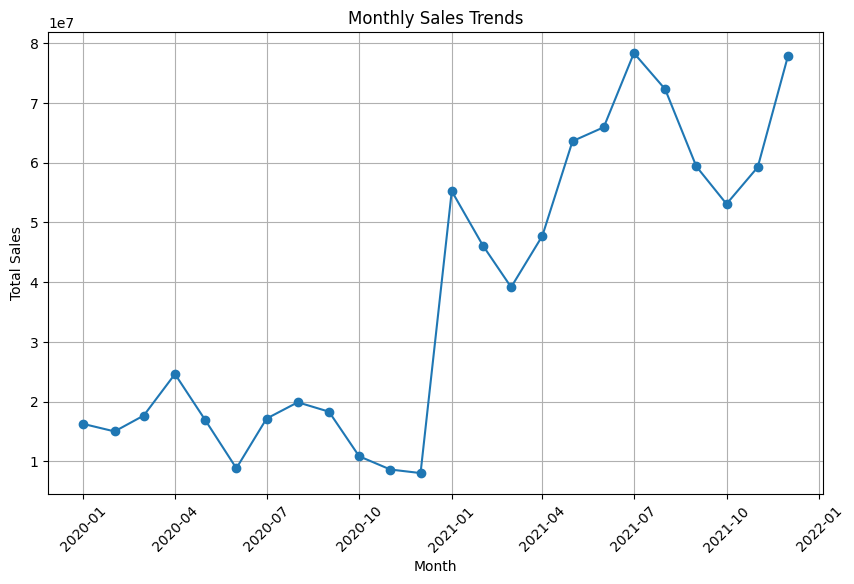

In [51]:
# Group by month and calculate total sales for each month
monthly_sales = adidas.groupby(adidas['Invoice Date'].dt.to_period('M'))['Total Sales'].sum()

# Convert the index (which is of type 'Period') to DateTime objects
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plot the sales trends over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [52]:
# Analyze the sales trends
diff = monthly_sales.diff()  # Calculate the difference between consecutive months
seasonality_threshold = 10000

# Check for seasonality
if (diff > seasonality_threshold).any():
    print("\nThese sales follow a seasonality.")
else:
    print("These sales do not follow a seasonality.")

# Check for trend
if (diff > 0).all() or (diff < 0).all():
    print("These sales follow a trend.")
else:
    print("\nThese sales do not follow a trend.")


These sales follow a seasonality.

These sales do not follow a trend.


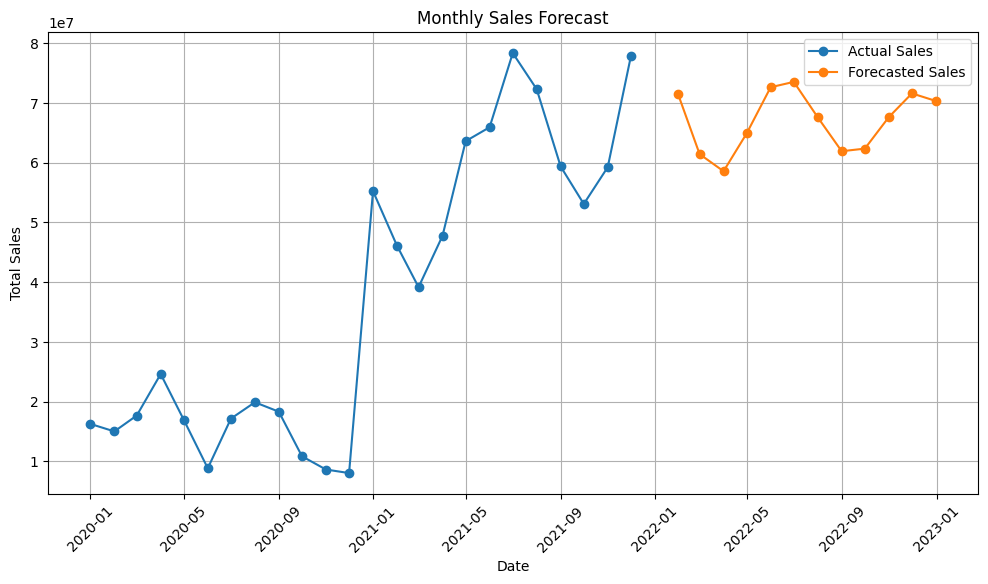

In [53]:
# Fit the ARIMA model to the data
model = ARIMA(monthly_sales, order=(2,1,2))  # Order: (p, d, q)
model_fit = model.fit()

# Make predictions for the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

#Visualize the actual sales data and the forecasted values for the next months.

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', label='Actual Sales')
plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, marker='o', label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [60]:
# prompt: create dashbords merged all visualised data

import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output

# Create a Dash app
app = dash.Dash(__name__)

# Create a layout for the app
app.layout = html.Div([
    html.H1("Adidas Sales Dashboard"),
    dbc.Row([
        dbc.Col(dcc.Graph(id='sales-plot'), width=6),
        dbc.Col(dcc.Graph(id='revenue-plot'), width=6)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='profit-plot'), width=6),
        dbc.Col(dcc.Graph(id='margin-plot'), width=6)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='forecast-plot'), width=12)
    ])
])

# Define the callback for the sales plot
@app.callback(
    Output('sales-plot', 'figure'),
    [Input('year-selector', 'value')])
def update_sales_plot(year):
    return {
        'data': [{
            'x': adidas['Invoice Date'][adidas['Year'] == year],
            'y': adidas['Total Sales'][adidas['Year'] == year]
        }],
        'layout': {
            'title': 'Monthly Sales for {}'.format(year)
        }
    }

# Define the callback for the revenue plot
@app.callback(
    Output('revenue-plot', 'figure'),
    [Input('year-selector', 'value')])
def update_revenue_plot(year):
    return {
        'data': [{
            'x': adidas['Invoice Date'][adidas['Year'] == year],
            'y': adidas['Revenue Last Year'][adidas['Year'] == year]
        }],
        'layout': {
            'title': 'Monthly Revenue for {}'.format(year)
        }
    }

# Define the callback for the profit plot
@app.callback(
    Output('profit-plot', 'figure'),
    [Input('year-selector', 'value')])
def update_profit_plot(year):
    return {
        'data': [{
            'x': adidas['Invoice Date'][adidas['Year'] == year],
            'y': adidas['Operating Profit'][adidas['Year'] == year]
        }],
        'layout': {
            'title': 'Monthly Profit for {}'.format(year)
        }
    }

# Define the callback for the margin plot
@app.callback(
    Output('margin-plot', 'figure'),
    [Input('year-selector', 'value')])
def update_margin_plot(year):
    return {
        'data': [{
            'x': adidas['Invoice Date'][adidas['Year'] == year],
            'y': adidas['Operating Margin'][adidas['Year'] == year]
        }],
        'layout': {
            'title': 'Monthly Operating Margin for {}'.format(year)
        }
    }

# Define the callback for the forecast plot
@app.callback(
    Output('forecast-plot', 'figure'),
    [Input('year-selector', 'value')])
def update_forecast_plot(year):
    return {
        'data': [{
            'x': pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps+1, freq='M')[1:],
            'y': forecast
        }],
        'layout': {
            'title': 'Monthly Sales Forecast for {}'.format(year)
        }
    }

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [59]:
pip install dash_bootstrap_components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 4.3 MB/s eta 0:00:00
